## Data Descriptions

### Kidney Disease Dataset

Predicting Chronic Kidney Disease based on health records.

Given 24 health related attributes taken in 2-month period of 400 patients, using the information of the 158 patients with complete records to predict the outcome (i.e. whether one has chronic kidney disease) of the remaining 242 patients (with missing values in their records).

**Problem Statement :** Classify whether the patients have "Classification" column 'ckd' or 'notckd'. This means whether the patient has kidney disorder or not.

In [1]:
# Importing the dataset and libaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

%matplotlib inline

In [3]:
kidney_df = pd.read_csv('kidney_disease.csv')

In [4]:
kidney_df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


** There are 26 columns **

In [5]:
kidney_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
id                400 non-null int64
age               391 non-null float64
bp                388 non-null float64
sg                353 non-null float64
al                354 non-null float64
su                351 non-null float64
rbc               248 non-null object
pc                335 non-null object
pcc               396 non-null object
ba                396 non-null object
bgr               356 non-null float64
bu                381 non-null float64
sc                383 non-null float64
sod               313 non-null float64
pot               312 non-null float64
hemo              348 non-null float64
pcv               330 non-null object
wc                295 non-null object
rc                270 non-null object
htn               398 non-null object
dm                398 non-null object
cad               398 non-null object
appet             399 non-null object
pe         

## Perform feature engineering on the columns to remove all the categorical columns and object datatype columns

** There are a lot of object data types. We need to convert them to numeric before any further processing **

In [6]:
kidney_df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [ ]:
kidney_df

** These columns have numerical values but have object dtype **

In [8]:
#These columns have \t? values

kidney_df.drop(kidney_df.index[[66,214,185, 133, 162]], inplace=True)

In [9]:
kidney_df[['pcv','wc','rc']] = kidney_df[['pcv','wc','rc']].apply(pd.to_numeric)

** These columns are categorical **

In [10]:
kidney_df[['htn','dm','cad','pe','ane']] = kidney_df[['htn','dm','cad','pe','ane']].replace(to_replace={'yes':1,'no':0})
kidney_df['dm'] = kidney_df['dm'].replace(to_replace={'\tno':0,'\tyes':1,' yes':1, '':np.nan})
kidney_df['cad'] = kidney_df['cad'].replace(to_replace='\tno',value=0)

kidney_df[['rbc','pc']] = kidney_df[['rbc','pc']].replace(to_replace={'abnormal':1,'normal':0})
kidney_df[['pcc','ba']] = kidney_df[['pcc','ba']].replace(to_replace={'present':1,'notpresent':0})

kidney_df[['appet']] = kidney_df[['appet']].replace(to_replace={'good':1,'poor':0})  #,'no':np.nan
kidney_df['classification'] = kidney_df['classification'].replace(to_replace={'ckd':1.0,'ckd\t':1.0,'notckd':0.0})  #,'no':0.0
kidney_df.rename(columns={'classification':'class'},inplace=True)

In [11]:
kidney_df['pe'] = kidney_df['pe'].replace(to_replace='good',value=0) # Not having pedal edema is good
kidney_df['appet'] = kidney_df['appet'].replace(to_replace='no',value=0)

# Dropping the index column
kidney_df.drop('id',axis=1,inplace=True)

In [12]:
kidney_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 399
Data columns (total 25 columns):
age      386 non-null float64
bp       384 non-null float64
sg       349 non-null float64
al       350 non-null float64
su       347 non-null float64
rbc      246 non-null float64
pc       331 non-null float64
pcc      391 non-null float64
ba       391 non-null float64
bgr      351 non-null float64
bu       376 non-null float64
sc       378 non-null float64
sod      309 non-null float64
pot      308 non-null float64
hemo     344 non-null float64
pcv      325 non-null float64
wc       291 non-null float64
rc       267 non-null float64
htn      393 non-null float64
dm       393 non-null object
cad      393 non-null float64
appet    394 non-null float64
pe       394 non-null float64
ane      394 non-null float64
class    395 non-null float64
dtypes: float64(24), object(1)
memory usage: 80.2+ KB


In [13]:
kidney_df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,0.0,0.0,0.0,121.0,...,44.0,7800.0,5.2,1.0,1,0.0,1.0,0.0,0.0,1.0
1,7.0,50.0,1.020,4.0,0.0,NaN,0.0,0.0,0.0,NaN,...,38.0,6000.0,NaN,0.0,0,0.0,1.0,0.0,0.0,1.0
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,...,31.0,7500.0,NaN,0.0,1,0.0,0.0,0.0,1.0,1.0
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,...,32.0,6700.0,3.9,1.0,0,0.0,0.0,1.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,...,35.0,7300.0,4.6,0.0,0,0.0,1.0,0.0,0.0,1.0


In [28]:
kidney_df[['bu','sc','sod','pot','hemo']].head()

,bu,sc,sod,pot,hemo
0,36.0,1.2,NaN,NaN,15.4
1,18.0,0.8,NaN,NaN,11.3
2,53.0,1.8,NaN,NaN,9.6
3,56.0,3.8,111.0,2.5,11.2
4,26.0,1.4,NaN,NaN,11.6


# Feature Selection

# verifying and if found remove the constant feature removal

In [31]:
print(kidney_df.shape)

(395, 25)


In [29]:
#find constant removal
from sklearn.feature_selection import VarianceThreshold

In [30]:
const_filter = VarianceThreshold(threshold = 0)
const_filter.fit(kidney_df)

VarianceThreshold(threshold=0)

In [51]:
kidney_df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,0.0,0.0,0.0,121.0,...,44.0,7800.0,5.2,1.0,1,0.0,1.0,0.0,0.0,1.0
1,7.0,50.0,1.020,4.0,0.0,NaN,0.0,0.0,0.0,NaN,...,38.0,6000.0,NaN,0.0,0,0.0,1.0,0.0,0.0,1.0
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,...,31.0,7500.0,NaN,0.0,1,0.0,0.0,0.0,1.0,1.0
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,...,32.0,6700.0,3.9,1.0,0,0.0,0.0,1.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,...,35.0,7300.0,4.6,0.0,0,0.0,1.0,0.0,0.0,1.0


In [52]:
# to get the list of constant features
const_list = [not temp for temp in const_filter.get_support()]
kidney_df.columns[const_list]

Index([], dtype='object')

In [53]:
kidney_filter = const_filter.transform(kidney_df)

(395, 25)


# find and remove Quassi const removal

In [40]:
quassi_const_filter = VarianceThreshold(threshold =0.1)
quassi_const_filter.fit(kidney_filter)

VarianceThreshold(threshold=0.1)

In [90]:
const_list = [temp for temp in quassi_const_filter.get_support()]
kidney_df.columns[const_list]

Index(['age', 'bp', 'al', 'su', 'rbc', 'pc', 'bgr', 'bu', 'sc', 'sod', 'pot',
       'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'appet', 'pe', 'ane', 'class'],
      dtype='object')

In [98]:
removed_const_list = [not temp for temp in quassi_const_filter.get_support()]
kidney_df.columns[removed_const_list]

Index(['sg', 'pcc', 'ba', 'cad'], dtype='object')

In [91]:
kidney_quassi_df = quassi_const_filter.transform(kidney_filter)
print(kidney_quassi_df.shape)

(395, 21)


In [96]:
kidney_quassi_df1= pd.DataFrame(kidney_quassi_df,columns = kidney_df.columns[const_list])
kidney_quassi_df1.head()

,age,bp,al,su,rbc,pc,bgr,bu,sc,sod,...,hemo,pcv,wc,rc,htn,dm,appet,pe,ane,class
0,48,80,1,0,NaN,0,121,36,1.2,NaN,...,15.4,44,7800,5.2,1,1,1,0,0,1
1,7,50,4,0,NaN,0,NaN,18,0.8,NaN,...,11.3,38,6000,NaN,0,0,1,0,0,1
2,62,80,2,3,0,0,423,53,1.8,NaN,...,9.6,31,7500,NaN,0,1,0,0,1,1
3,48,70,4,0,0,1,117,56,3.8,111,...,11.2,32,6700,3.9,1,0,0,1,1,1
4,51,80,2,0,0,0,106,26,1.4,NaN,...,11.6,35,7300,4.6,0,0,1,0,0,1


In [97]:
kidney_quassi_df1.shape

(395, 21)

# Find and remove the Duplicate features

In [99]:
kidney_quassi_df_T = kidney_quassi_df1.T
print(kidney_quassi_df_T.shape)

(21, 395)


In [100]:
kidney_df_T = pd.DataFrame(kidney_quassi_df_T).T

In [101]:
print(kidney_df_T.shape)

(395, 21)


In [102]:
kidney_df_T.head()

,age,bp,al,su,rbc,pc,bgr,bu,sc,sod,...,hemo,pcv,wc,rc,htn,dm,appet,pe,ane,class
0,48,80,1,0,NaN,0,121,36,1.2,NaN,...,15.4,44,7800,5.2,1,1,1,0,0,1
1,7,50,4,0,NaN,0,NaN,18,0.8,NaN,...,11.3,38,6000,NaN,0,0,1,0,0,1
2,62,80,2,3,0,0,423,53,1.8,NaN,...,9.6,31,7500,NaN,0,1,0,0,1,1
3,48,70,4,0,0,1,117,56,3.8,111,...,11.2,32,6700,3.9,1,0,0,1,1,1
4,51,80,2,0,0,0,106,26,1.4,NaN,...,11.6,35,7300,4.6,0,0,1,0,0,1


In [130]:
kidney_df_final = kidney_df_T.copy()

In [131]:
kidney_df_final.head()

,age,bp,al,su,rbc,pc,bgr,bu,sc,sod,...,hemo,pcv,wc,rc,htn,dm,appet,pe,ane,class
0,48,80,1,0,NaN,0,121,36,1.2,NaN,...,15.4,44,7800,5.2,1,1,1,0,0,1
1,7,50,4,0,NaN,0,NaN,18,0.8,NaN,...,11.3,38,6000,NaN,0,0,1,0,0,1
2,62,80,2,3,0,0,423,53,1.8,NaN,...,9.6,31,7500,NaN,0,1,0,0,1,1
3,48,70,4,0,0,1,117,56,3.8,111,...,11.2,32,6700,3.9,1,0,0,1,1,1
4,51,80,2,0,0,0,106,26,1.4,NaN,...,11.6,35,7300,4.6,0,0,1,0,0,1


In [132]:
kidney_df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 21 columns):
age      386 non-null object
bp       384 non-null object
al       350 non-null object
su       347 non-null object
rbc      246 non-null object
pc       331 non-null object
bgr      351 non-null object
bu       376 non-null object
sc       378 non-null object
sod      309 non-null object
pot      308 non-null object
hemo     344 non-null object
pcv      325 non-null object
wc       291 non-null object
rc       267 non-null object
htn      393 non-null object
dm       393 non-null object
appet    394 non-null object
pe       394 non-null object
ane      394 non-null object
class    395 non-null object
dtypes: object(21)
memory usage: 64.9+ KB


## Question: Remove missing values from the data frame

In [133]:
kidney_df_final.isnull().sum()

age        9
bp        11
al        45
su        48
rbc      149
pc        64
bgr       44
bu        19
sc        17
sod       86
pot       87
hemo      51
pcv       70
wc       104
rc       128
htn        2
dm         2
appet      1
pe         1
ane        1
class      0
dtype: int64

In [134]:
print(kidney_df_final.shape)
#drop the missing data
kidney_df_final.drop(['rbc','wc','rc'],axis =1, inplace = True)
kidney_df_final = kidney_df_final.fillna(kidney_df_final.mean())
print(kidney_df_final.shape)

(395, 21)
(395, 18)


## Question : Perform Descriptive Statistics on the dataset and come up with insights on shape, spread and central deviation 

In [135]:
kidney_df_final.describe()

,age,bp,al,su,pc,bgr,bu,sc,sod,pot,hemo,pcv,htn,dm,appet,pe,ane,class
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,51.455959,76.432292,1.008571,0.455331,0.226586,148.031339,57.479255,3.086640,137.597087,4.628247,12.534012,38.898462,0.368957,0.340967,0.791878,0.190355,0.152284,0.620253
std,16.845351,13.500540,1.269492,1.034994,0.383697,75.138023,49.416675,5.648511,9.230974,2.837424,2.728991,8.195215,0.481909,0.473432,0.405964,0.392581,0.359296,0.485939
min,2.000000,50.000000,0.000000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,0.000000,0.000000,0.000000,101.000000,27.000000,0.900000,135.000000,4.000000,10.850000,34.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,54.000000,80.000000,0.000000,0.000000,0.000000,125.000000,44.000000,1.400000,137.597087,4.628247,12.534012,38.898462,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,64.000000,80.000000,2.000000,0.455331,0.226586,149.015670,62.500000,3.086640,141.000000,4.800000,14.700000,44.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,90.000000,180.000000,5.000000,5.000000,1.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Question : Perform EDA and find any correlation

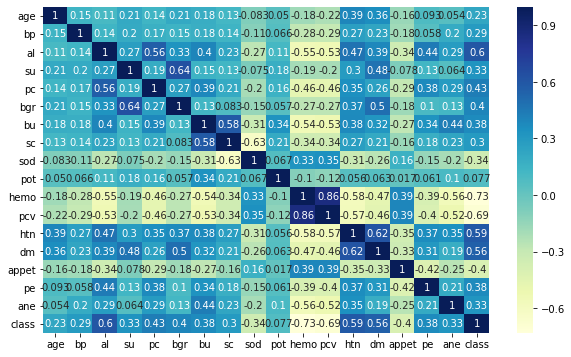

In [137]:
corrmat = kidney_df_final.corr()
plt.figure(figsize = (10,6))
sns.heatmap(corrmat,annot = True,cmap = 'YlGnBu')

## Question: Perform classification using Decision Tree algorithm and explain the performance

In [138]:
kidney_df_final.columns

Index(['age', 'bp', 'al', 'su', 'pc', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo',
       'pcv', 'htn', 'dm', 'appet', 'pe', 'ane', 'class'],
      dtype='object')

In [147]:
# split the dependent and independent features
X = kidney_df_final.iloc[:,:-1]
y = kidney_df_final.iloc[:,-1]
print(X.shape, y.shape)

(395, 17) (395,)


In [148]:
#Split the train and test data 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 1)

# Create the Model

In [177]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
def decision_tree_alog_model(X_train,X_test,y_train,y_test,criterion):
    dtc = DecisionTreeClassifier(criterion=criterion,max_depth=5,random_state=1) 
    dtc.fit(X_train,y_train)
    y_pred = dtc.predict(X_test)
    print("Accuracy Score: ", accuracy_score(y_test, y_pred))
    print("Train Score",dtc.score(X_train,y_train))
    print("Test Score",dtc.score(X_test,y_test))
    print("Classification Report: \n ", classification_report(y_test, y_pred))
    print("ConfusionMatrix Report: \n ", confusion_matrix(y_test, y_pred))

In [178]:
%%time
decision_tree_alog_model(X_train,X_test,y_train,y_test,'entropy')

Accuracy Score:  0.9113924050632911
Train Score 1.0
Test Score 0.9113924050632911
Classification Report: 
                precision    recall  f1-score   support

         0.0       0.91      0.89      0.90        35
         1.0       0.91      0.93      0.92        44

    accuracy                           0.91        79
   macro avg       0.91      0.91      0.91        79
weighted avg       0.91      0.91      0.91        79

ConfusionMatrix Report: 
  [[31  4]
 [ 3 41]]
Wall time: 89 ms


In [179]:
%%time
decision_tree_alog_model(X_train,X_test,y_train,y_test,'gini')

Accuracy Score:  0.9113924050632911
Train Score 0.9968354430379747
Test Score 0.9113924050632911
Classification Report: 
                precision    recall  f1-score   support

         0.0       0.91      0.89      0.90        35
         1.0       0.91      0.93      0.92        44

    accuracy                           0.91        79
   macro avg       0.91      0.91      0.91        79
weighted avg       0.91      0.91      0.91        79

ConfusionMatrix Report: 
  [[31  4]
 [ 3 41]]
Wall time: 27 ms


## Question: Perform classification using Random Forest and explain the metrics

In [168]:
from sklearn.ensemble import RandomForestClassifier


In [180]:
def random_forest_classifier_alog(X_train,X_test,y_train,y_test,criterion):
    rfc = RandomForestClassifier( n_estimators=100,criterion=criterion,max_depth=5, random_state = 1)
    rfc.fit(X_train,y_train)
    y_pred = rfc.predict(X_test)
    print("Accuracy Score: ", accuracy_score(y_test, y_pred))
    print("Train Score",rfc.score(X_train,y_train))
    print("Test Score",rfc.score(X_test,y_test))
    print("Classification Report: \n ", classification_report(y_test, y_pred))
    print("ConfusionMatrix Report: \n ", confusion_matrix(y_test, y_pred))

In [181]:
%%time
random_forest_classifier_alog(X_train,X_test,y_train,y_test,'gini')

Accuracy Score:  0.9746835443037974
Train Score 0.9936708860759493
Test Score 0.9746835443037974
Classification Report: 
                precision    recall  f1-score   support

         0.0       0.97      0.97      0.97        35
         1.0       0.98      0.98      0.98        44

    accuracy                           0.97        79
   macro avg       0.97      0.97      0.97        79
weighted avg       0.97      0.97      0.97        79

ConfusionMatrix Report: 
  [[34  1]
 [ 1 43]]
Wall time: 250 ms


In [182]:
%%time
random_forest_classifier_alog(X_train,X_test,y_train,y_test,'entropy')

Accuracy Score:  0.9873417721518988
Train Score 0.9968354430379747
Test Score 0.9873417721518988
Classification Report: 
                precision    recall  f1-score   support

         0.0       1.00      0.97      0.99        35
         1.0       0.98      1.00      0.99        44

    accuracy                           0.99        79
   macro avg       0.99      0.99      0.99        79
weighted avg       0.99      0.99      0.99        79

ConfusionMatrix Report: 
  [[34  1]
 [ 0 44]]
Wall time: 180 ms
